In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from load_df import load_df
import numpy as np


# NAME_BASICS


In [33]:
name_basics = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/name.basics.tsv", sep='\t', na_values="\\N")

In [34]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


# TITLE_BASICS


In [35]:
title_basics = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.basics.tsv", sep='\t')

/var/folders/k2/fq9zzjj524g1k_t0ty5k_llw0000gn/T/ipykernel_9556/1996787279.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.basics.tsv", sep='\t')


In [36]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [40]:
title_basics['titleType'].unique()

2372

In [ ]:
title_basics.info()

In [ ]:
title_basics ['isAdult'] = title_basics['isAdult'].astype('int16')
title_basics ['startYear'] = title_basics['startYear'].astype('int16')
title_basics ['runtimeMinutes'] = title_basics['runtimeMinutes'].astype('int16')


# Création de table_movies à partir de title_basics


In [46]:
# Title basics avec que les genres 'movie':

table_movies = title_basics[title_basics['titleType'] == 'movie']
table_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
146,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
501,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,NaN
573,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
590,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama


In [42]:
table_movies['genres'].nunique()

1478

In [47]:
# Transformer '\N' en NaN
table_movies.replace('\\N', np.nan, inplace=True)


/var/folders/k2/fq9zzjj524g1k_t0ty5k_llw0000gn/T/ipykernel_9556/1704720835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_movies.replace('\\N', np.nan, inplace=True)


In [48]:
# Drop colonne vide (endYear):
table_movies.drop('endYear',
  axis=1, inplace=True)

/var/folders/k2/fq9zzjj524g1k_t0ty5k_llw0000gn/T/ipykernel_9556/331406049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_movies.drop('endYear',


In [49]:
# Transformer les strings avec des genres en listes pour découvrir combien de genres distincts il y en a au total:
table_movies['genres'] = table_movies['genres'].str.split(',')

/var/folders/k2/fq9zzjj524g1k_t0ty5k_llw0000gn/T/ipykernel_9556/3580699126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_movies['genres'] = table_movies['genres'].str.split(',')


In [50]:
table_movies_genres_exploded = table_movies.explode('genres')
table_movies_genres_exploded.head()

In [51]:
table_movies_genres_exploded['genres'].unique()

# Faire une fonction pour traduire les genres en français?

array(['Romance', 'Documentary', 'News', 'Sport', nan, 'Action',
       'Adventure', 'Biography', 'Drama', 'Fantasy', 'Comedy', 'War',
       'Crime', 'Family', 'History', 'Sci-Fi', 'Thriller', 'Western',
       'Mystery', 'Horror', 'Music', 'Animation', 'Musical', 'Film-Noir',
       'Adult', 'Reality-TV', 'Talk-Show', 'Game-Show'], dtype=object)

# TITLE_AKAS

In [23]:
title_akas = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.akas.tsv", sep='\t', na_values="\\N")

/var/folders/k2/fq9zzjj524g1k_t0ty5k_llw0000gn/T/ipykernel_9556/3635032754.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  title_akas = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.akas.tsv", sep='\t', na_values="\\N")


In [38]:
title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,NaN,NaN,original,NaN,1
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita,US,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0


In [27]:
# Filtrer que les ids de title_akas qui sont dans la table_movies créée:

ids_movies = title_akas['titleId'].isin(table_movies['tconst'])

# Récuperer de title_akas que les lignes qui ont les ids de la table_movies(ids_movies):

merge_akas_movies = title_akas[ids_movies]

In [28]:
merge_akas_movies.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
72,tt0000009,1,Miss Jerry,NaN,NaN,original,NaN,1
73,tt0000009,2,Miss Jerry,AU,NaN,imdbDisplay,NaN,0
74,tt0000009,3,Miss Jerry,HU,NaN,imdbDisplay,NaN,0
75,tt0000009,4,Miss Jerry,US,NaN,imdbDisplay,NaN,0
76,tt0000009,5,Fräulein Jerry,DE,NaN,NaN,literal title,0


In [29]:
# Création de fichier csv alegé:
merge_akas_movies.to_csv('akas_cleaned', sep=',', index=False, encoding='utf-8')

In [30]:
akas_cleaned = pd.read_csv("/Users/lua/wild/project2/Projet-Data-IA/akas_cleaned.csv", sep=',')

In [31]:
akas_cleaned.head()

# title_basics = 10.856.889 lignes
# table_movies = 709.746
# title_akas = 47.852.373
# akas_cleaned = 675.759

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000009,1,Miss Jerry,NaN,NaN,original,NaN,1
1,tt0000009,2,Miss Jerry,AU,NaN,imdbDisplay,NaN,0
2,tt0000009,3,Miss Jerry,HU,NaN,imdbDisplay,NaN,0
3,tt0000009,4,Miss Jerry,US,NaN,imdbDisplay,NaN,0
4,tt0000009,5,Fräulein Jerry,DE,NaN,NaN,literal title,0


# RATINGS TABLE

In [ ]:
title_ratings = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.ratings.tsv", sep='\t')

In [ ]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2041
1,tt0000002,5.7,272
2,tt0000003,6.5,1994
3,tt0000004,5.4,178
4,tt0000005,6.2,2753


In [ ]:
title_ratings['tconst'].nunique() == title_ratings.shape[0]

True

In [ ]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421910 entries, 0 to 1421909
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1421910 non-null  object 
 1   averageRating  1421910 non-null  float64
 2   numVotes       1421910 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.5+ MB


In [ ]:
# Transformer les donnés 64 bits en 16 et 8 pour aléger le fichier

title_ratings['averageRating'] = title_ratings['averageRating'].astype('float16')
title_ratings['numVotes'] = title_ratings['numVotes'].astype('int8')


In [ ]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421910 entries, 0 to 1421909
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1421910 non-null  object 
 1   averageRating  1421910 non-null  float16
 2   numVotes       1421910 non-null  int8   
dtypes: float16(1), int8(1), object(1)
memory usage: 14.9+ MB


In [ ]:
title_ratings.describe()

,averageRating,numVotes
count,1.421910e+06,1.421910e+06
mean,NaN,1.800575e+01
std,0.000000e+00,4.720612e+01
min,1.000000e+00,-1.280000e+02
25%,6.199219e+00,8.000000e+00
50%,7.101562e+00,1.600000e+01
75%,7.898438e+00,3.700000e+01
max,1.000000e+01,1.270000e+02


In [ ]:
# Suggestion: Supprimer les nb votes négatifs?

negative_nb_votes = title_ratings[title_ratings["numVotes"] < 0]
negative_nb_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191583 entries, 0 to 1421879
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         191583 non-null  object 
 1   averageRating  191583 non-null  float16
 2   numVotes       191583 non-null  int8   
dtypes: float16(1), int8(1), object(1)
memory usage: 3.5+ MB


In [ ]:
best_ratings = title_ratings[title_ratings["averageRating"] > 7]
best_ratings.head()

,tconst,averageRating,numVotes
11,tt0000012,7.398438,22
13,tt0000014,7.101562,-72
58,tt0000060,7.300781,90
199,tt0000211,7.398438,90
255,tt0000310,7.199219,35


NameError: name 'best_ratings' is not defined

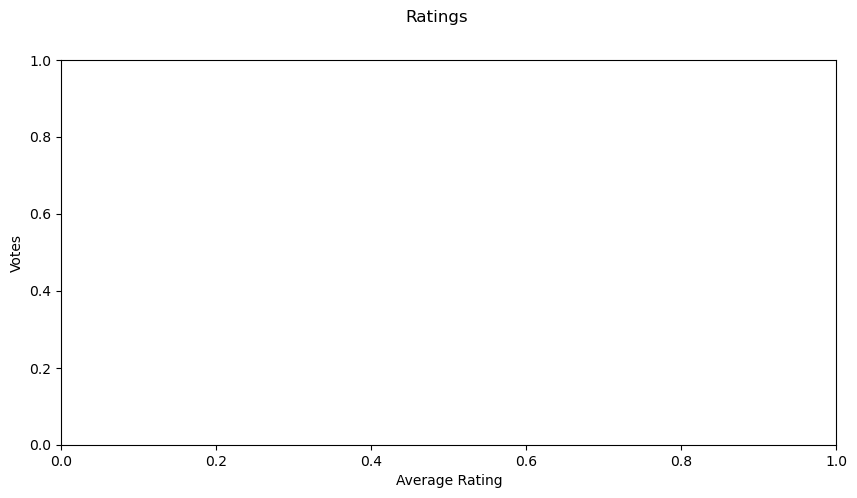

In [ ]:
fig, axes = plt.subplots(figsize = (10, 5))
fig.suptitle("Ratings")
axes.set_ylabel("Votes")
axes.set_xlabel("Average Rating")
axe_max = sns.scatterplot(data = best_ratings,
                x = "averageRating",
                y = "numVotes",
                hue = "genres",
                palette = "deep")

#plt.legend(title = "genres")
#axes.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13)))
#axes.tick_params(axis='x', rotation=45)

plt.show()

## Crossing tables (ratings avec les titres des films) - Ratings x title.basics

In [ ]:
ratings_merged = pd.merge(title_ratings, title_basics[['tconst', 'originalTitle']], on='tconst', how='inner')
ratings_merged.head()

,tconst,averageRating,numVotes,originalTitle
0,tt0000001,5.699219,-7,Carmencita
1,tt0000002,5.699219,16,Le clown et ses chiens
2,tt0000003,6.500000,-54,Pauvre Pierrot
3,tt0000004,5.398438,-78,Un bon bock
4,tt0000005,6.199219,-63,Blacksmith Scene


# CREW TABLE

In [ ]:
title_crew = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.crew.tsv", sep='\t', na_values="\\N")
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN


In [ ]:
crew_merged = pd.merge(title_crew, name_basics[['tconst', 'originalTitle']], on='tconst', how='inner')
ratings_merged.head()

In [ ]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030757 entries, 0 to 10030756
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 229.6+ MB


In [ ]:
# Suggestion: Supprimer la colonne 'writers'?

title_crew['writers'].describe()

count     10030757
unique     1332046
top             \N
freq       4376437
Name: writers, dtype: object

# PRINCIPALS TABLE

In [ ]:
title_principals = pd.read_csv("/Users/lua/wild/project2/dataset_projet2/title.principals.tsv", sep='\t', na_values="\\N")


In [ ]:
title_principals.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN
5,tt0000002,2,nm1335271,composer,NaN,NaN
6,tt0000003,1,nm0721526,director,NaN,NaN
7,tt0000003,2,nm1770680,producer,producer,NaN
8,tt0000003,3,nm0721526,producer,producer,NaN
9,tt0000003,4,nm1335271,composer,NaN,NaN
